In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("../pollution_us_noNA.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436876 entries, 0 to 436875
Data columns (total 28 columns):
State Code           436876 non-null int64
County Code          436876 non-null int64
Site Num             436876 non-null int64
Address              436876 non-null object
State                436876 non-null object
County               436876 non-null object
City                 436876 non-null object
Date Local           436876 non-null object
NO2 Units            436876 non-null object
NO2 Mean             436876 non-null float64
NO2 1st Max Value    436876 non-null float64
NO2 1st Max Hour     436876 non-null int64
NO2 AQI              436876 non-null int64
O3 Units             436876 non-null object
O3 Mean              436876 non-null float64
O3 1st Max Value     436876 non-null float64
O3 1st Max Hour      436876 non-null int64
O3 AQI               436876 non-null int64
SO2 Units            436876 non-null object
SO2 Mean             436876 non-null float64
SO2 1st Max

In [3]:


data["Date Local"] = pd.to_datetime(data["Date Local"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436876 entries, 0 to 436875
Data columns (total 28 columns):
State Code           436876 non-null int64
County Code          436876 non-null int64
Site Num             436876 non-null int64
Address              436876 non-null object
State                436876 non-null object
County               436876 non-null object
City                 436876 non-null object
Date Local           436876 non-null datetime64[ns]
NO2 Units            436876 non-null object
NO2 Mean             436876 non-null float64
NO2 1st Max Value    436876 non-null float64
NO2 1st Max Hour     436876 non-null int64
NO2 AQI              436876 non-null int64
O3 Units             436876 non-null object
O3 Mean              436876 non-null float64
O3 1st Max Value     436876 non-null float64
O3 1st Max Hour      436876 non-null int64
O3 AQI               436876 non-null int64
SO2 Units            436876 non-null object
SO2 Mean             436876 non-null float64
SO2

In [4]:
# CO Unit is ppm
# other ppb

data.columns

Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [5]:
drop_list = ['State Code', 'County Code', 'Site Num', 'Address', 'NO2 Units', 'O3 Units', 'SO2 Units']
data = data.drop(drop_list, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436876 entries, 0 to 436875
Data columns (total 21 columns):
State                436876 non-null object
County               436876 non-null object
City                 436876 non-null object
Date Local           436876 non-null datetime64[ns]
NO2 Mean             436876 non-null float64
NO2 1st Max Value    436876 non-null float64
NO2 1st Max Hour     436876 non-null int64
NO2 AQI              436876 non-null int64
O3 Mean              436876 non-null float64
O3 1st Max Value     436876 non-null float64
O3 1st Max Hour      436876 non-null int64
O3 AQI               436876 non-null int64
SO2 Mean             436876 non-null float64
SO2 1st Max Value    436876 non-null float64
SO2 1st Max Hour     436876 non-null int64
SO2 AQI              436876 non-null float64
CO Units             436876 non-null object
CO Mean              436876 non-null float64
CO 1st Max Value     436876 non-null float64
CO 1st Max Hour      436876 non-null int6

In [115]:
%matplotlib inline
from datetime import datetime
import matplotlib as mtp
import matplotlib.pyplot as plt


In [187]:
# plot AQI with years and state

dataSt = data[["State", "Date Local", "NO2 AQI", "O3 AQI", "SO2 AQI", "CO AQI"]]

# group by and mean
# 一天有四筆資料
dataSt = dataSt[dataSt["State"] != 'Country Of Mexico']

dataSt = dataSt.groupby(["State", "Date Local"]).mean()

# 日資料
dataSt


NO2 AQI  O3 AQI  SO2 AQI  CO AQI
State   Date Local                                  
Alabama 2013-12-01     37.0    24.0      1.0     6.0
        2013-12-02     30.0    12.0      3.0     6.0
        2013-12-03     21.0    11.0      3.0     3.0
        2013-12-04     18.0    13.0      1.0     2.0
        2013-12-05     15.0    13.0      1.0     2.0
        2013-12-06      9.0     6.0      0.0     2.0
        2013-12-07      8.0     9.0      0.0     2.0
        2013-12-08      9.0     0.0      4.0     3.0
        2013-12-09      8.0     7.0      0.0     3.0
        2013-12-10     26.0    19.0      1.0     3.0
        2013-12-11     26.0    17.0     17.0     5.0
        2013-12-12     26.0    25.0     11.0     3.0
        2013-12-13     33.0    18.0     17.0     6.0
        2013-12-14     20.0    20.0      7.0     2.0
        2013-12-15      8.0    20.0      0.0     1.0
        2013-12-16     38.0    19.0      1.0     6.0
        2013-12-17     33.0    30.0      1.0     7.0
        2013-12-18     37.0    25.0     16.0     3.0
        2013-12-19     28.0    28.0      4.0     9.0
        2013-12-20     13.0    28.0      3.0     2.0
        2013-12-21      8.0    24.0      0.0     1.0
        2013-12-22     13.0    27.0      1.0     2.0
        2013-12-23      7.0    18.0      0.0     2.0
        2013-12-24      8.0    27.0      0.0     3.0
        2013-12-25     22.0    26.0      7.0     6.0
        2013-12-26     25.0    28.0     50.0     8.0
        2013-12-27     27.0    26.0     27.0     6.0
        2013-12-28     24.0    15.0     11.0     7.0
        2013-12-29     24.0    22.0      0.0     5.0
        2013-12-30     19.0    10.0      6.0     6.0
...                     ...     ...      ...     ...
Wyoming 2016-03-01      3.0    43.0      0.0     1.0
        2016-03-02      1.0    44.0      0.0     1.0
        2016-03-03     10.0    48.0      0.0     2.0
        2016-03-04     16.0    41.0      0.0     1.0
        2016-03-05     33.0    41.0      1.0     1.0
        2016-03-06      3.0    45.0      0.0     1.0
        2016-03-07     11.0    36.0      0.0     1.0
        2016-03-08      8.0    40.0      0.0     1.0
        2016-03-09     18.0    42.0      0.0     1.0
        2016-03-11     19.0    45.0      0.0     1.0
        2016-03-12     10.0    43.0      4.0     1.0
        2016-03-13      3.0    43.0      0.0     1.0
        2016-03-14     17.0    45.0      0.0     1.0
        2016-03-15      1.0    41.0      0.0     1.0
        2016-03-16      2.0    44.0      0.0     1.0
        2016-03-17      3.0    44.0      0.0     1.0
        2016-03-18      2.0    39.0      0.0     1.0
        2016-03-19      4.0    40.0      0.0     1.0
        2016-03-20     23.0    44.0      0.0     1.0
        2016-03-21     18.0    49.0      0.0     1.0
        2016-03-22     25.0    47.0      1.0     1.0
        2016-03-23      2.0    39.0      0.0     1.0
        2016-03-24      8.0    45.0      0.0     1.0
        2016-03-25      9.0    45.0      0.0     1.0
        2016-03-26     25.0    38.0      0.0     1.0
        2016-03-27     22.0    46.0      0.0     1.0
        2016-03-28     21.0    48.0      0.0     1.0
        2016-03-29      3.0    37.0      0.0     1.0
        2016-03-30      1.0    44.0      0.0     1.0
        2016-03-31      1.0    44.0      0.0     1.0

[144721 rows x 4 columns]

In [8]:
# 分開 日期與State 各自獨立
dataGroup = dataSt.groupby(level=0)

In [41]:
dataGroup["NO2 AQI"].get_group("Wyoming").groupby(pd.Grouper(level='Date Local', freq='M')).mean()

Date Local
2007-01-31    10.096774
2007-02-28     3.857143
2007-03-31     4.258065
2007-04-30     3.333333
2007-05-31     3.451613
2007-06-30     6.366667
2007-07-31     7.967742
2007-08-31     6.774194
2007-09-30     6.033333
2007-10-31     6.193548
2007-11-30     7.807692
2007-12-31     6.967742
2008-01-31    11.387097
2008-02-29     9.413793
2008-03-31     7.354839
2008-04-30     4.321429
2008-05-31     6.000000
2008-06-30     4.366667
2008-07-31     6.258065
2008-08-31     5.741935
2008-09-30     6.466667
2008-10-31     6.677419
2008-11-30     5.090909
2008-12-31          NaN
2009-01-31          NaN
2009-02-28          NaN
2009-03-31          NaN
2009-04-30          NaN
2009-05-31          NaN
2009-06-30          NaN
                ...    
2013-10-31    10.275862
2013-11-30    13.400000
2013-12-31    14.814815
2014-01-31     6.566667
2014-02-28    16.071429
2014-03-31    11.000000
2014-04-30     8.760000
2014-05-31     8.064516
2014-06-30     8.666667
2014-07-31     8.838710
2014-

### 四種 AQI 列舉 最高的州

Text(0.5, 1.0, 'NO2 AQI Top 4')

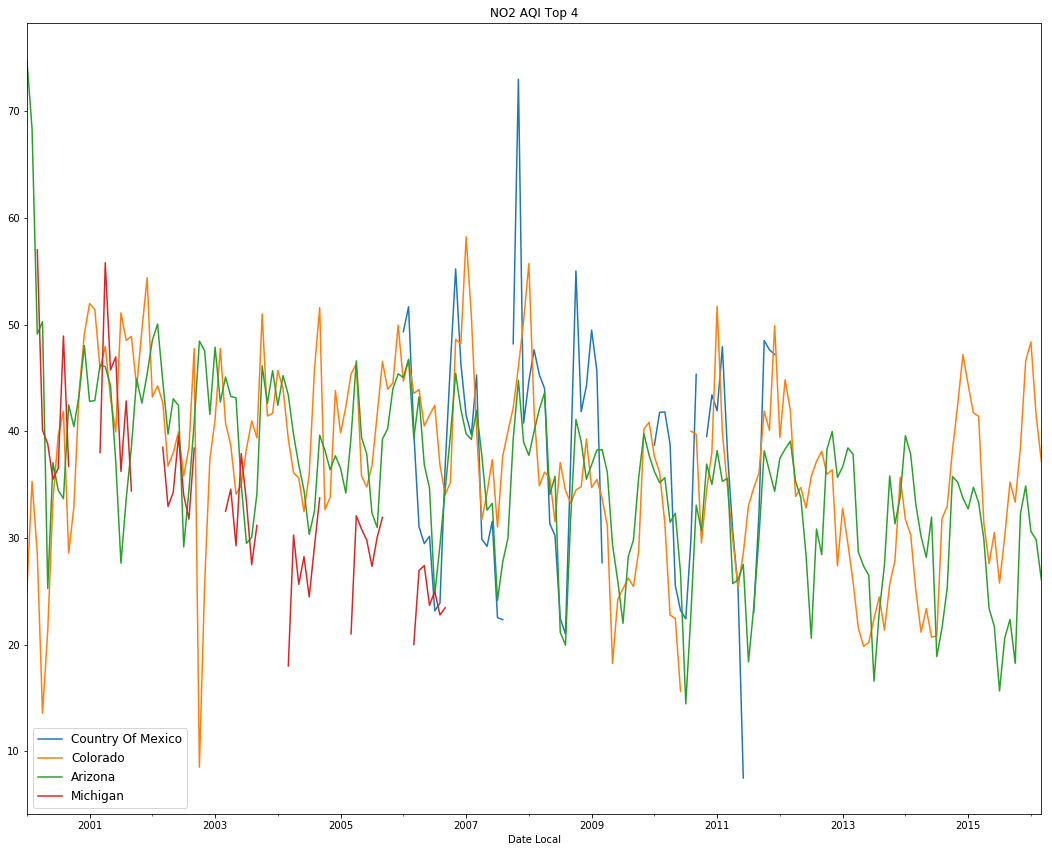

In [20]:
plt.figure(figsize=(40,32))
plt.subplot(221)
NO2 = dataGroup["NO2 AQI"]
NO2_top = NO2.mean().nlargest(4).index # list
for i in range(len(NO2_top)):
    # frequency = Monthly
    NO2.get_group(NO2_top[i]).groupby(pd.Grouper(level='Date Local', freq='M')).mean().plot()
plt.legend(NO2_top, loc=3, fontsize='large')
plt.title("NO2 AQI Top 4")


    

Text(0.5, 1.0, 'SO2 AQI Top 4')

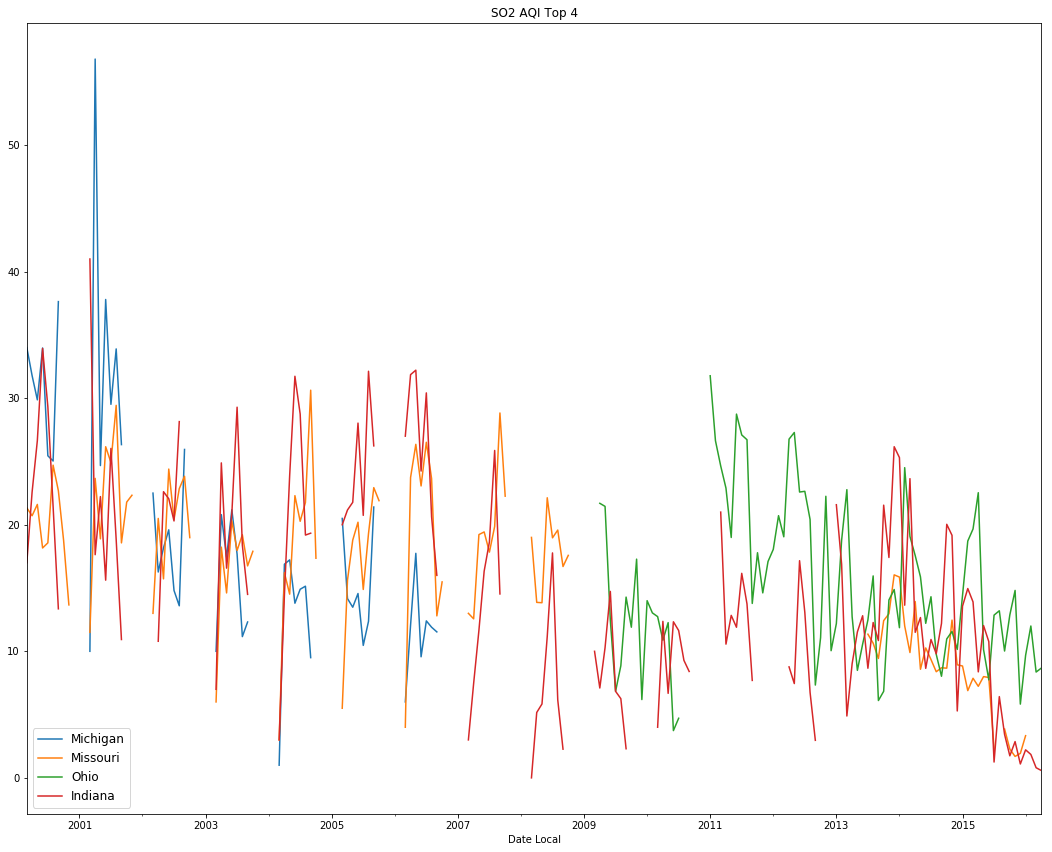

In [21]:
# SO2 AQI
plt.figure(figsize=(40,32))
plt.subplot(222)
SO2 = dataGroup["SO2 AQI"]
SO2_top = SO2.mean().nlargest(4).index # list
for i in range(len(SO2_top)):
    # frequency = Monthly
    SO2.get_group(SO2_top[i]).groupby(pd.Grouper(level='Date Local', freq='M')).mean().plot()
plt.legend(SO2_top, loc=3, fontsize='large')
plt.title("SO2 AQI Top 4")

Text(0.5, 1.0, 'O3 AQI Top 4')

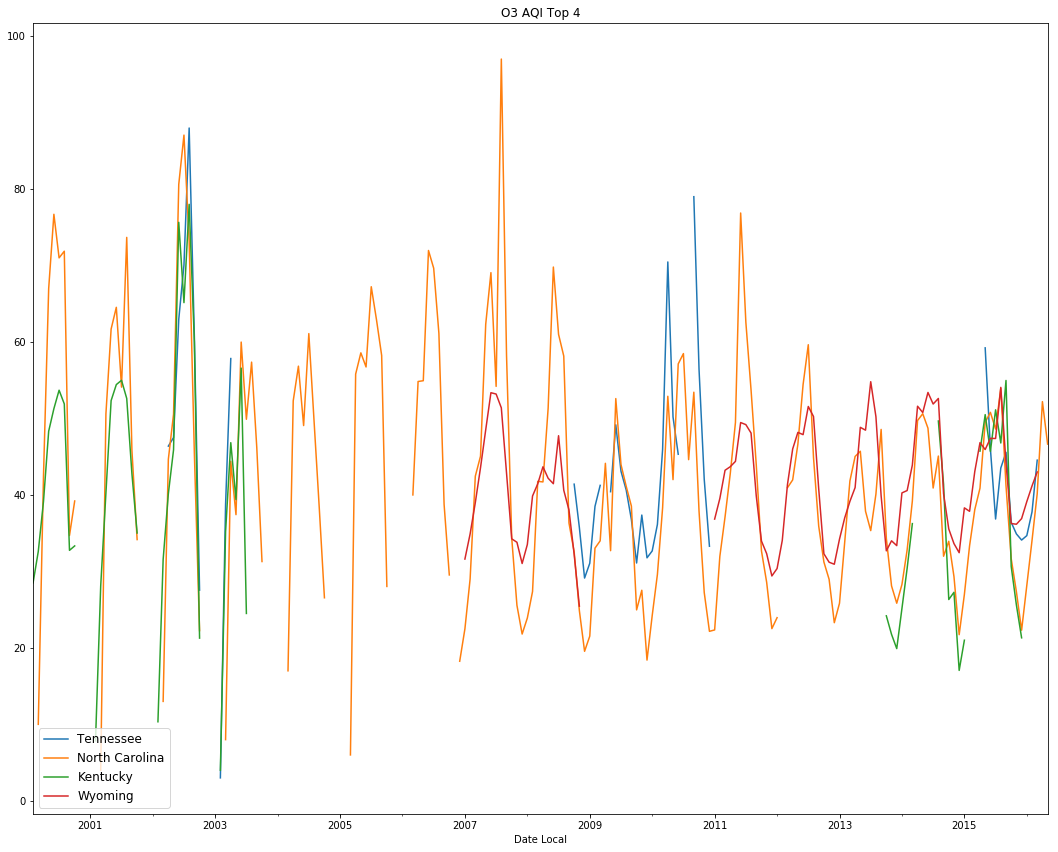

In [22]:
# O3 AQI
plt.figure(figsize=(40,32))
plt.subplot(223)
O3 = dataGroup["O3 AQI"]
O3_top = O3.mean().nlargest(4).index # list
for i in range(len(O3_top)):
    # frequency = Monthly
    O3.get_group(O3_top[i]).groupby(pd.Grouper(level='Date Local', freq='M')).mean().plot()
plt.legend(O3_top, loc=3, fontsize='large')
plt.title("O3 AQI Top 4")


Text(0.5, 1.0, 'CO AQI Top 4')

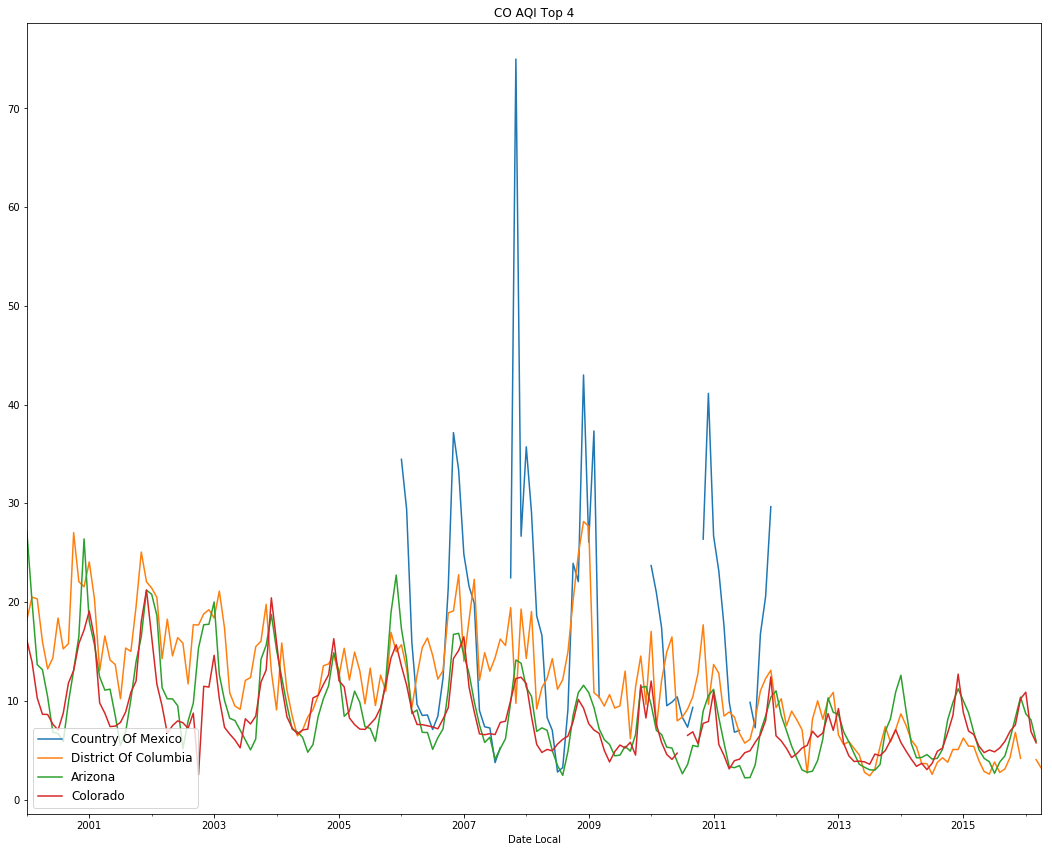

In [23]:
# CO AQI

plt.figure(figsize=(40,32))
plt.subplot(224)
CO = dataGroup["CO AQI"]
CO_top = CO.mean().nlargest(4).index # list
for i in range(len(CO_top)):
    # frequency = Monthly
    CO.get_group(CO_top[i]).groupby(pd.Grouper(level='Date Local', freq='M')).mean().plot()
plt.legend(CO_top, loc=3, fontsize='large')
plt.title("CO AQI Top 4")

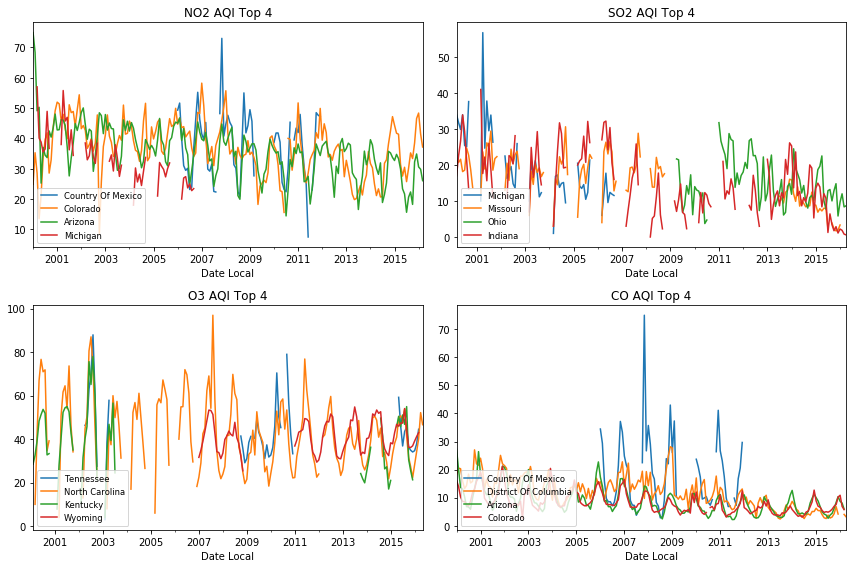

In [29]:

plt.figure(figsize=(12,8))
plt.subplot(221)
GroupAQI = dataGroup["NO2 AQI"]
GroupAQI_top = GroupAQI.mean().nlargest(4).index # list
for i in range(len(GroupAQI_top)):
    # frequency = Monthly
    GroupAQI.get_group(GroupAQI_top[i]).groupby(pd.Grouper(level='Date Local', freq='M')).mean().plot()
plt.legend(GroupAQI_top, loc=3, fontsize='small')
plt.title("NO2 AQI Top 4")


plt.subplot(222)
GroupAQI = dataGroup["SO2 AQI"]
GroupAQI_top = GroupAQI.mean().nlargest(4).index # list
for i in range(len(GroupAQI_top)):
    # frequency = Monthly
    GroupAQI.get_group(GroupAQI_top[i]).groupby(pd.Grouper(level='Date Local', freq='M')).mean().plot()
plt.legend(GroupAQI_top, loc=3, fontsize='small')
plt.title("SO2 AQI Top 4")


plt.subplot(223)
GroupAQI = dataGroup["O3 AQI"]
GroupAQI_top = GroupAQI.mean().nlargest(4).index # list
for i in range(len(GroupAQI_top)):
    # frequency = Monthly
    GroupAQI.get_group(GroupAQI_top[i]).groupby(pd.Grouper(level='Date Local', freq='M')).mean().plot()
plt.legend(GroupAQI_top, loc=3, fontsize='small')
plt.title("O3 AQI Top 4")


plt.subplot(224)
GroupAQI = dataGroup["CO AQI"]
GroupAQI_top = GroupAQI.mean().nlargest(4).index # list
for i in range(len(GroupAQI_top)):
    # frequency = Monthly
    GroupAQI.get_group(GroupAQI_top[i]).groupby(pd.Grouper(level='Date Local', freq='M')).mean().plot()
plt.legend(GroupAQI_top, loc=3, fontsize='small')
plt.title("CO AQI Top 4")

plt.tight_layout()
plt.savefig("../AQI TOP.svg", format='svg', bbox_inches='tight')

## 四種污染物的 年平均變化


In [31]:
poll = data[["Date Local", "SO2 Mean", "O3 Mean", "CO Mean", "NO2 Mean"]]

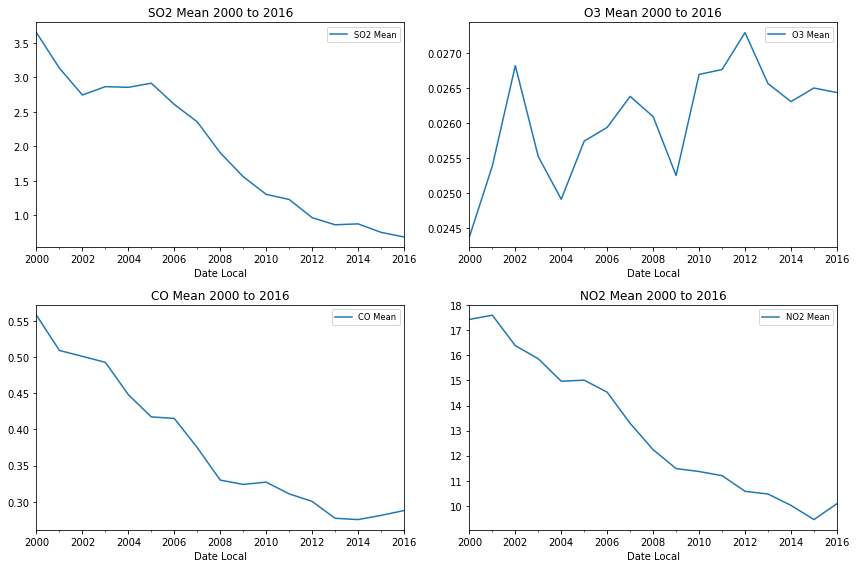

In [62]:
plt.figure(figsize=(12,8))

pollDt = poll.resample("Y", on = "Date Local")

poll_list = ["SO2 Mean", "O3 Mean", "CO Mean", "NO2 Mean"]

for i in range(len(poll_list)):
    sub = 220 + i + 1
    plt.subplot(sub)
    pollDt[poll_list[i]].mean().plot()
    plt.title(poll_list[i] + " 2000 to 2016")
    plt.legend(labels=[poll_list[i]], loc='best', fontsize='small')
    

plt.tight_layout()
plt.savefig("../PollAverage.png", bbox_inches="tight")
plt.savefig("../PollAverage.svg", format='svg', bbox_inches='tight')


## 想看看 內華達州的 AQI

In [143]:
nevada = data[data["State"] == 'Nevada']
nevada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2423 entries, 38118 to 434543
Data columns (total 22 columns):
State                2423 non-null object
County               2423 non-null object
City                 2423 non-null object
Date Local           2423 non-null datetime64[ns]
NO2 Mean             2423 non-null float64
NO2 1st Max Value    2423 non-null float64
NO2 1st Max Hour     2423 non-null int64
NO2 AQI              2423 non-null int64
O3 Mean              2423 non-null float64
O3 1st Max Value     2423 non-null float64
O3 1st Max Hour      2423 non-null int64
O3 AQI               2423 non-null int64
SO2 Mean             2423 non-null float64
SO2 1st Max Value    2423 non-null float64
SO2 1st Max Hour     2423 non-null int64
SO2 AQI              2423 non-null float64
CO Units             2423 non-null object
CO Mean              2423 non-null float64
CO 1st Max Value     2423 non-null float64
CO 1st Max Hour      2423 non-null int64
CO AQI               2423 non-null f

In [144]:
nevada = nevada[["Date Local", "SO2 AQI", "O3 AQI", "NO2 AQI", "CO AQI"]]


In [145]:
nevada_m = nevada.resample("m", on="Date Local").mean()
nevada_m["AQI"] = nevada_m[["SO2 AQI", "O3 AQI", "NO2 AQI", "CO AQI"]].apply(lambda x: max(x), axis=1)


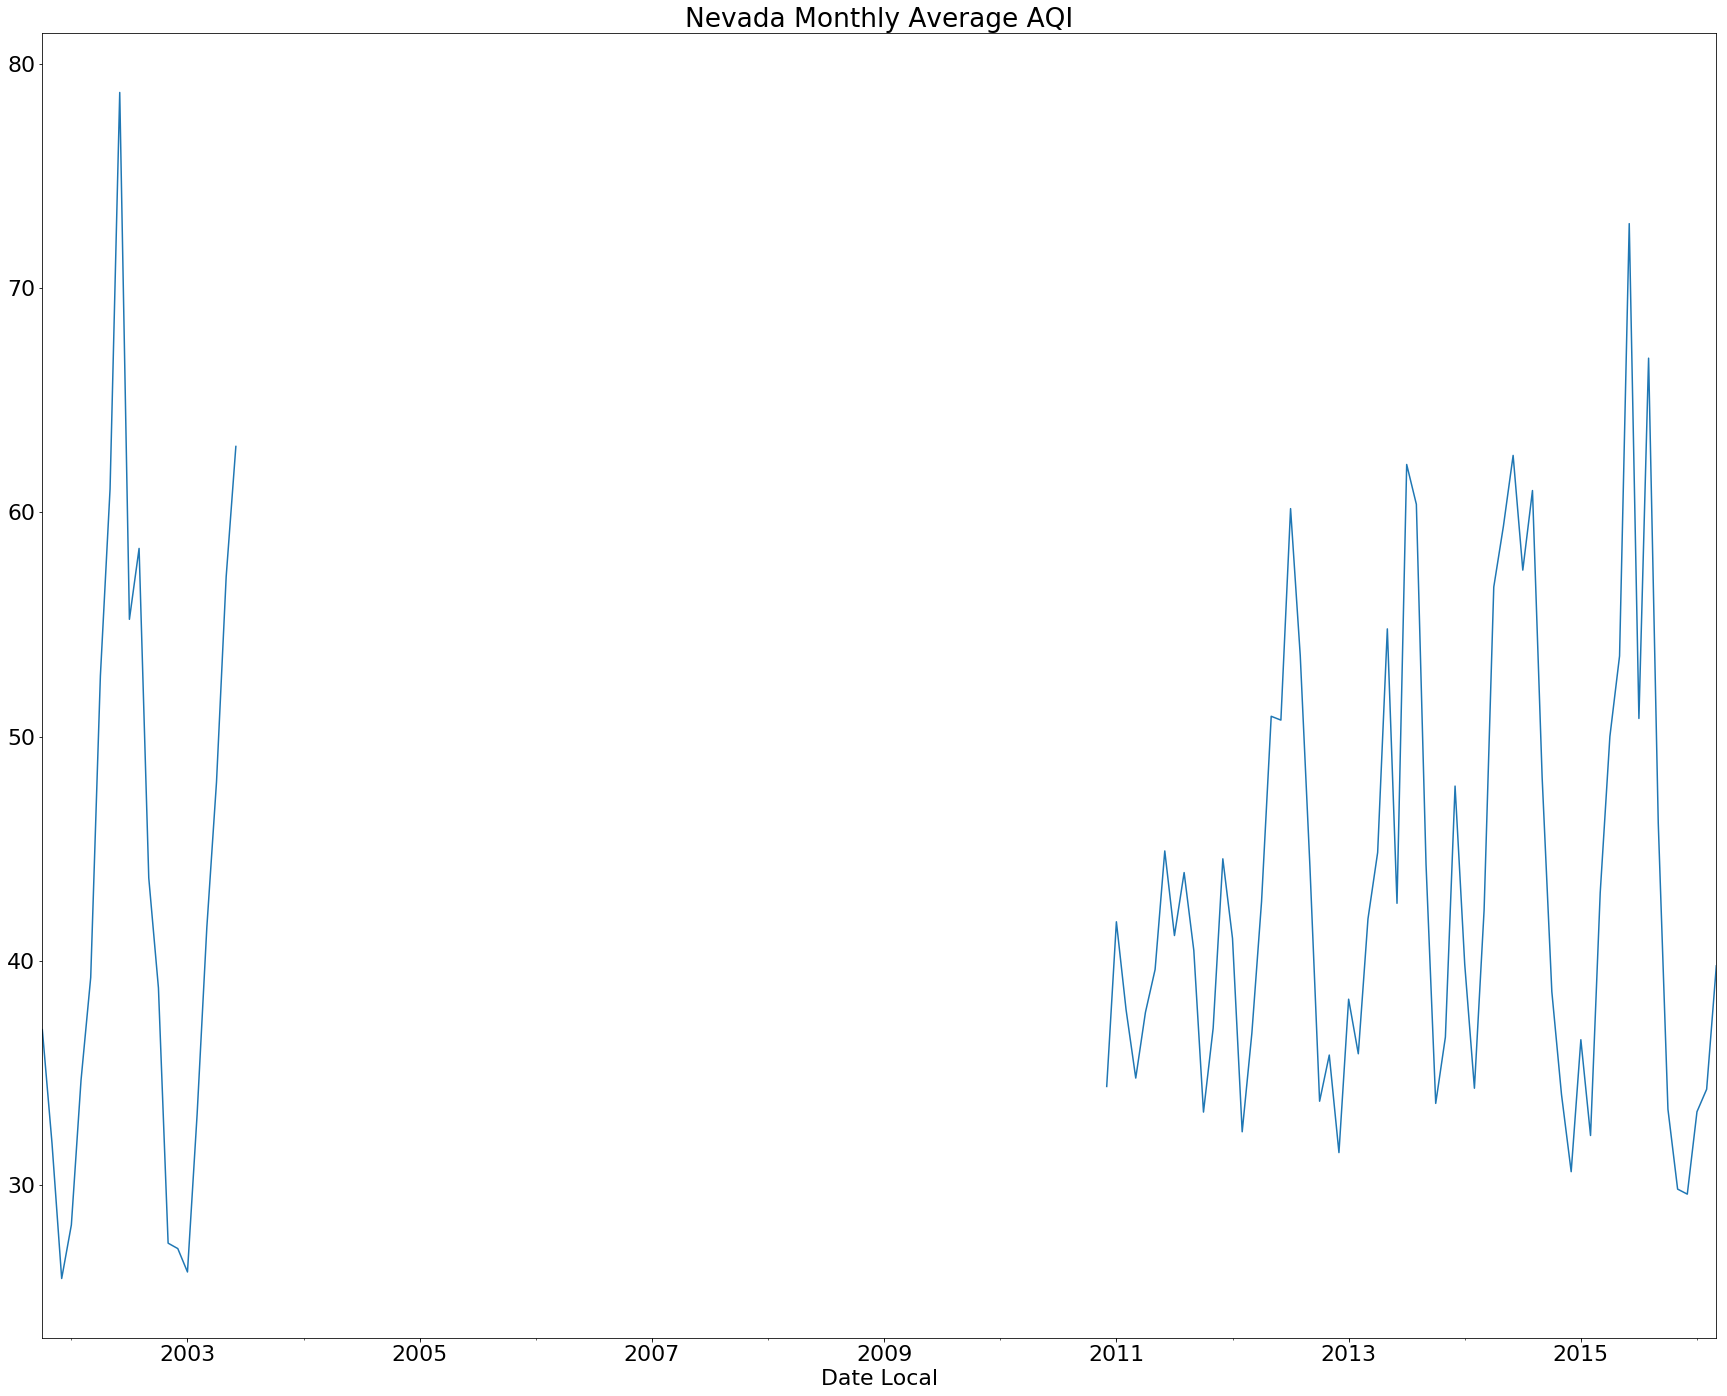

In [150]:
plt.figure(figsize=(30,24))
plt.rcParams.update({'font.size': 22})
nevada_m["AQI"].plot()
plt.title("Nevada Monthly Average AQI")
plt.savefig("../Nevada M AQI.png", bbox_inches='tight')
plt.savefig("../Nevada M AQI.svg", format='svg', bbox_inches='tight')

In [152]:
def AQI_level(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unheathly"
    elif aqi <= 300:
        return "Very Unhealthy"
    elif aqi >= 301:
        return "Harazdous"
    else:
        return None
    

nevada_d = nevada.resample("d", on="Date Local").mean()
nevada_d["AQI"] = nevada_d[["SO2 AQI", "O3 AQI", "NO2 AQI", "CO AQI"]].apply(lambda x: max(x), axis=1)
nevada_d["Level"] = nevada_d["AQI"].apply(AQI_level)
nevada_d

,SO2 AQI,O3 AQI,NO2 AQI,CO AQI,AQI,Level
Date Local,,,,,,
2001-10-01,16.0,46.0,13.0,0.0,46.0,Good
2001-10-02,0.0,48.0,17.0,0.0,48.0,Good
2001-10-03,11.0,44.0,16.0,0.0,44.0,Good
2001-10-04,10.0,46.0,16.0,0.0,46.0,Good
2001-10-05,0.0,48.0,13.0,0.0,48.0,Good
2001-10-06,0.0,35.0,9.0,0.0,35.0,Good
2001-10-07,0.0,42.0,0.0,0.0,42.0,Good
2001-10-08,7.0,42.0,16.0,0.0,42.0,Good
2001-10-09,0.0,45.0,28.0,0.0,45.0,Good


In [155]:
nevada_d = nevada_d.dropna()

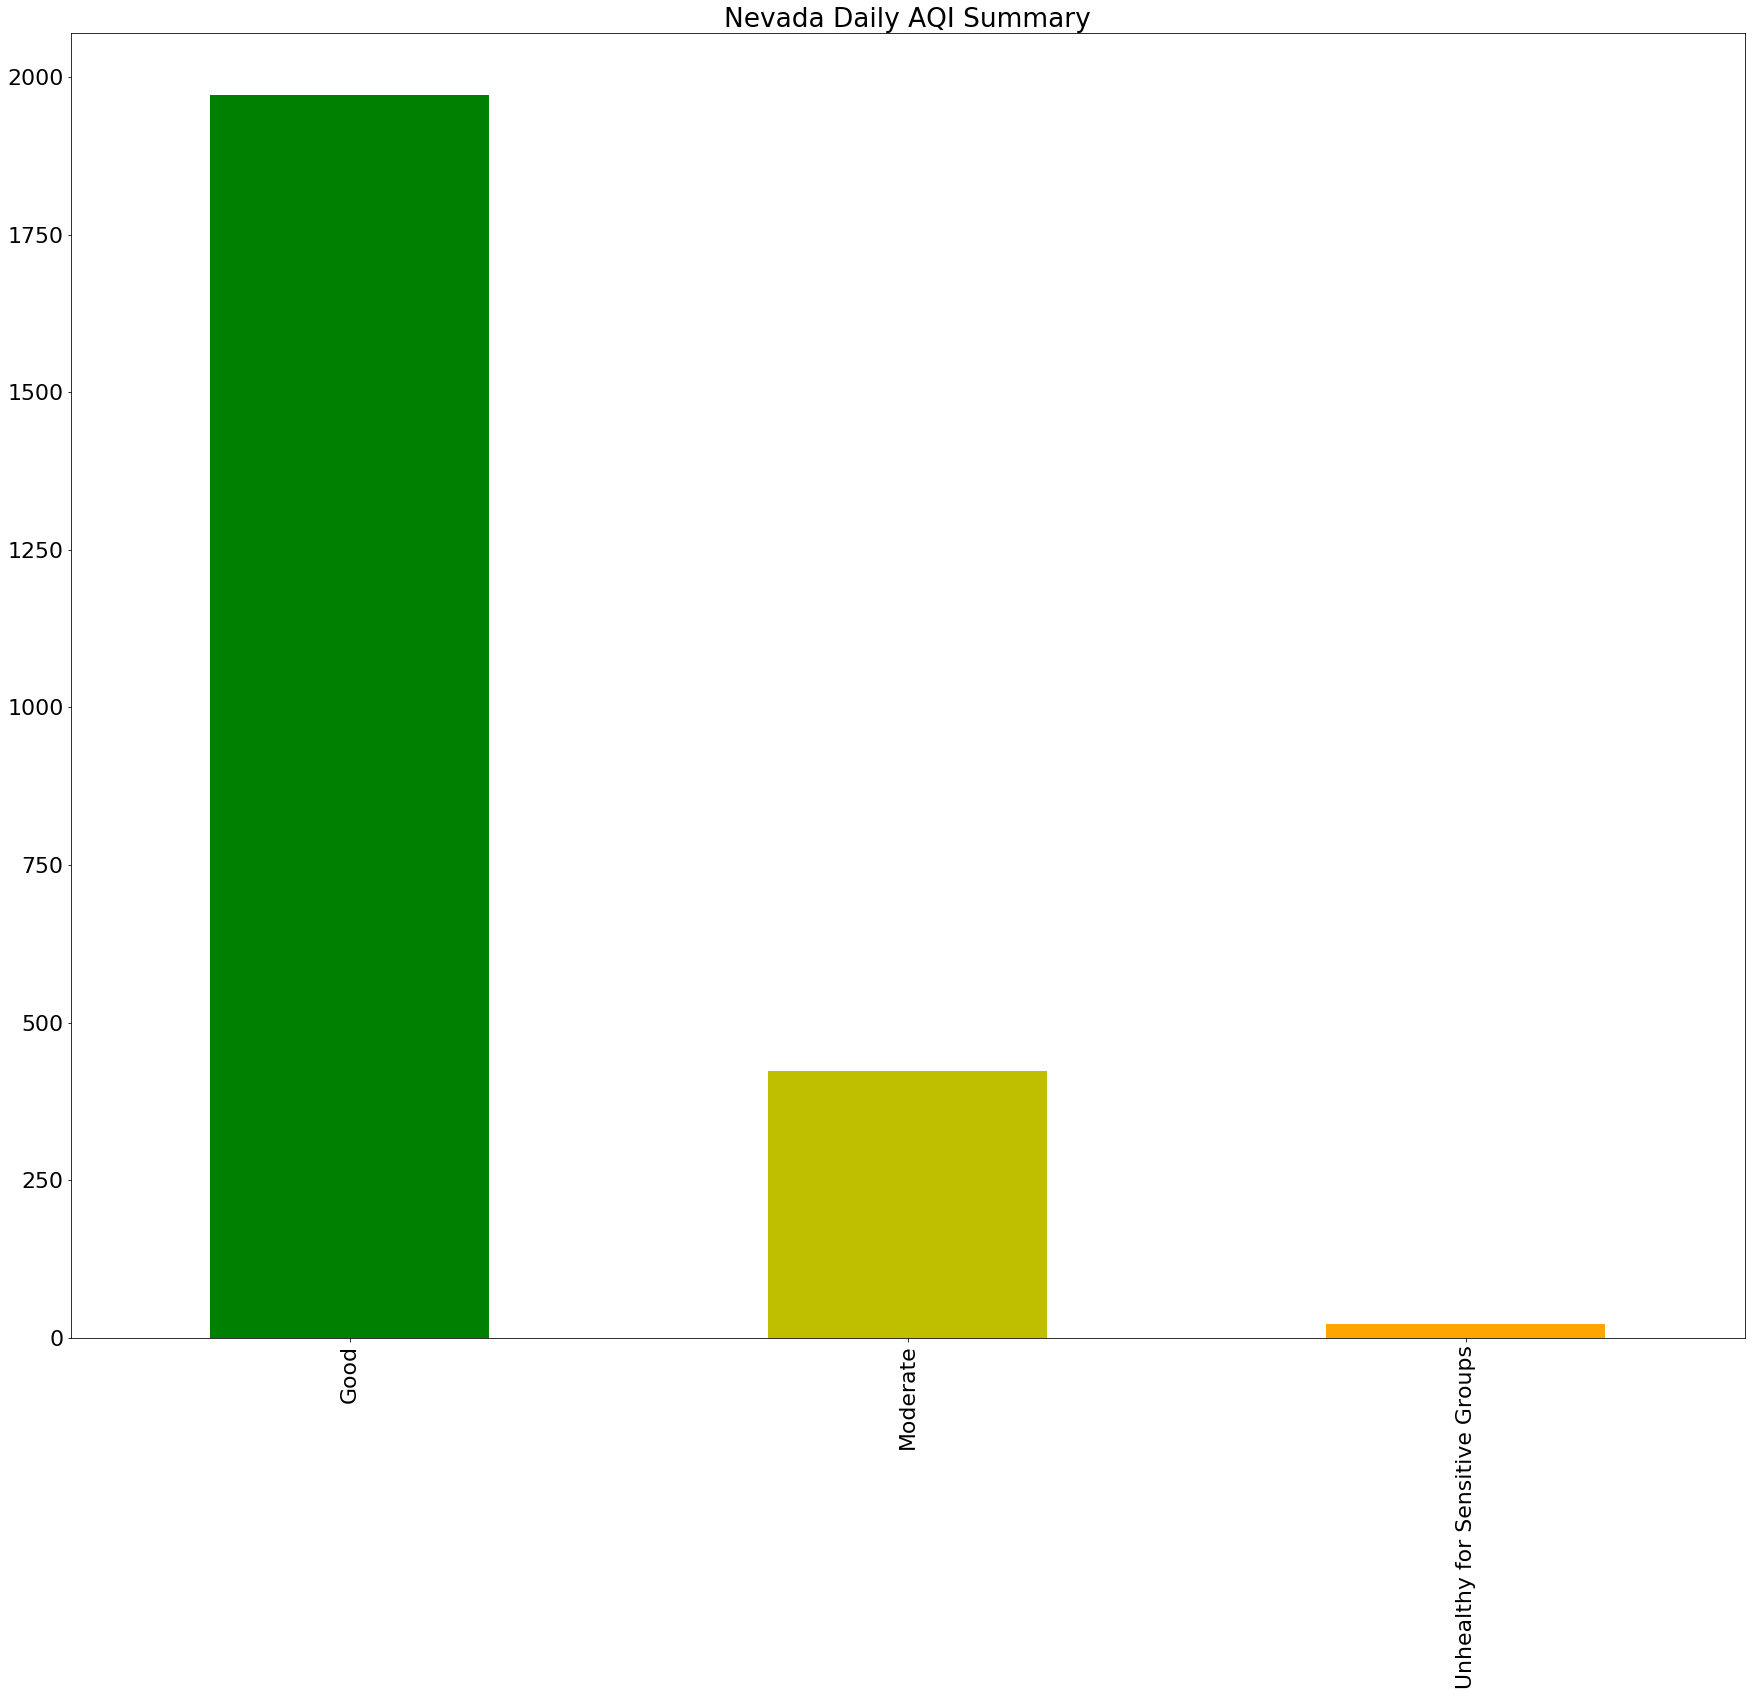

In [160]:
plt.figure(figsize=(30,24))
nevada_d["Level"].value_counts().plot(kind='bar', stacked=True, color=['g', 'y', 'orange'])
plt.title("Nevada Daily AQI Summary")
plt.savefig("../Nevada Level.png", bbox_inches='tight')
plt.savefig("../Nevada Level.svg", format='svg', bbox_inches='tight')

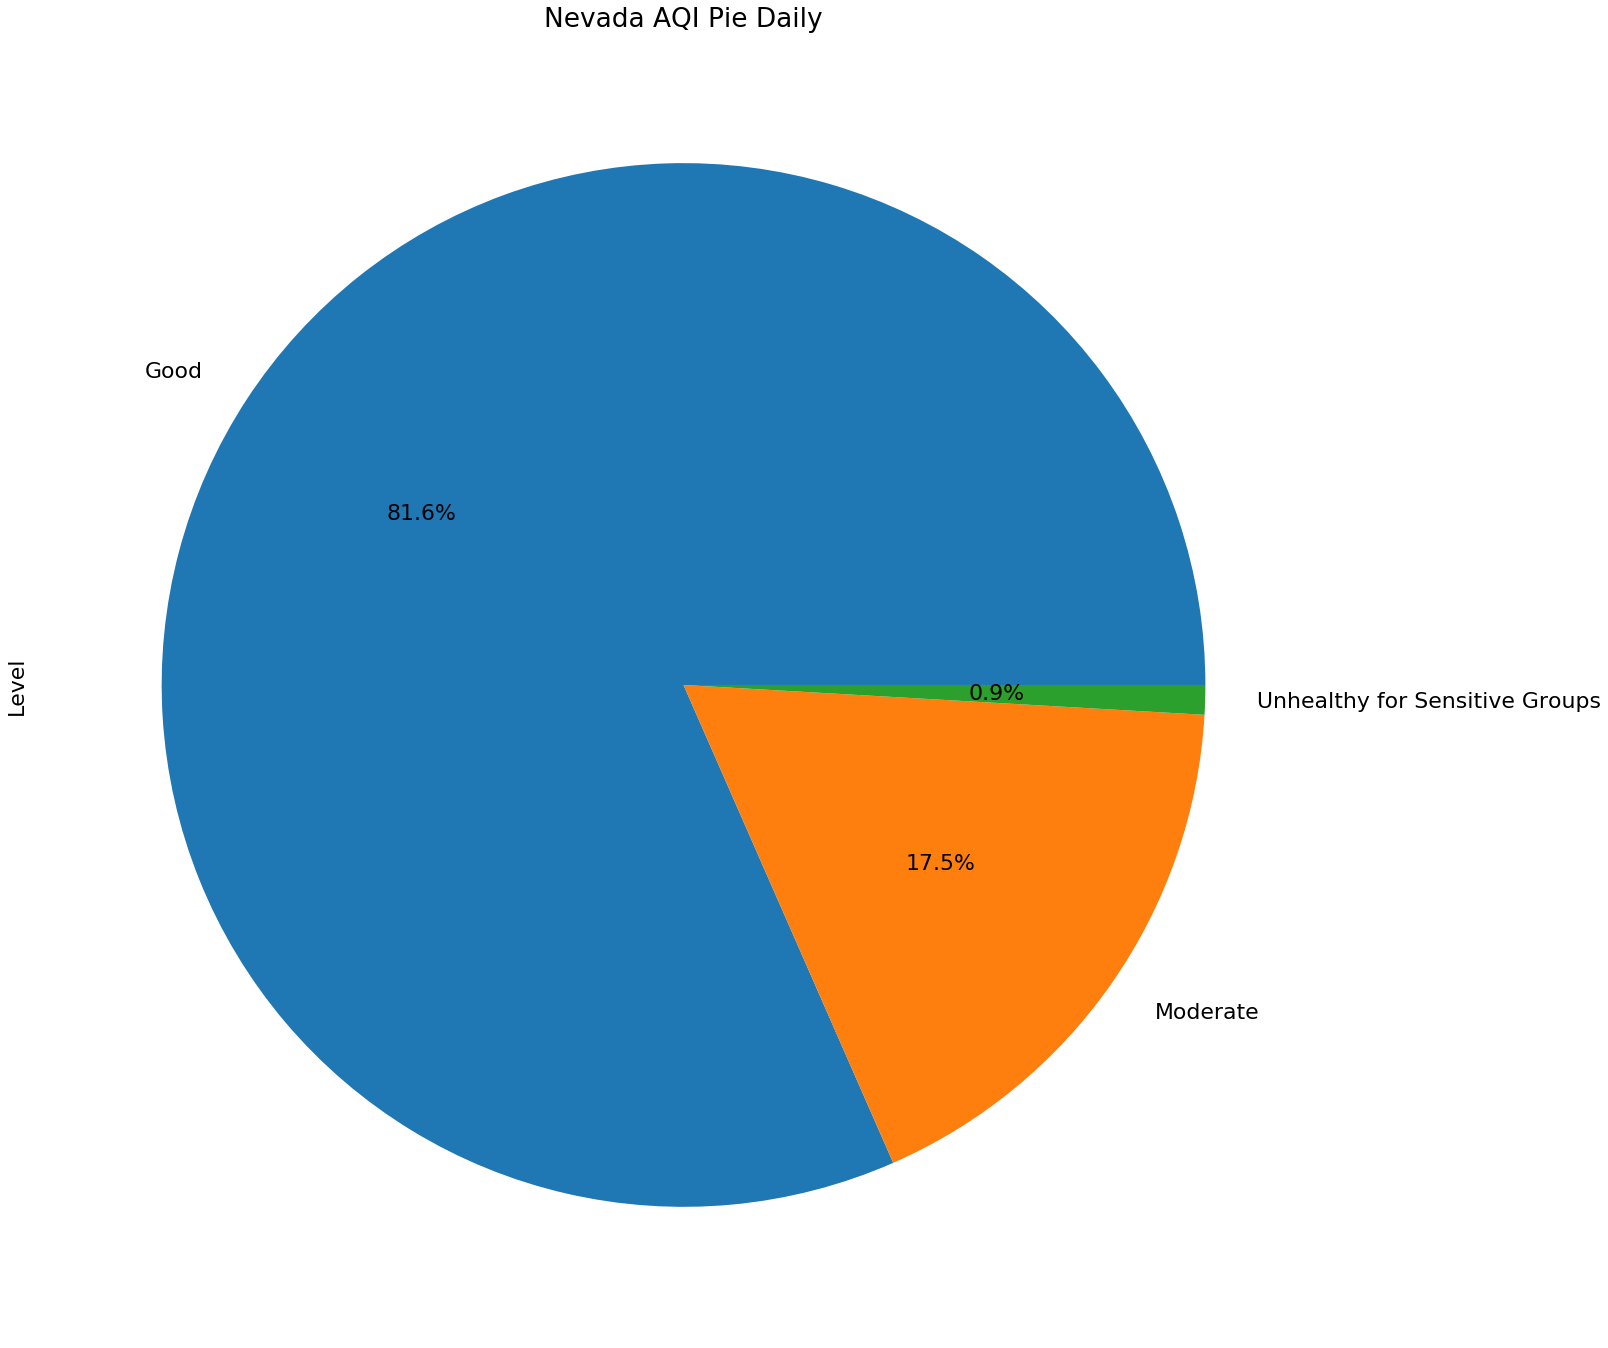

In [165]:
plt.figure(figsize=(30,24))
nevada_d["Level"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Nevada AQI Pie Daily")
plt.savefig("../Nevada pie.png", bbox_inches='tight')
plt.savefig("../Nevada pie.svg", format='svg', bbox_inches='tight')

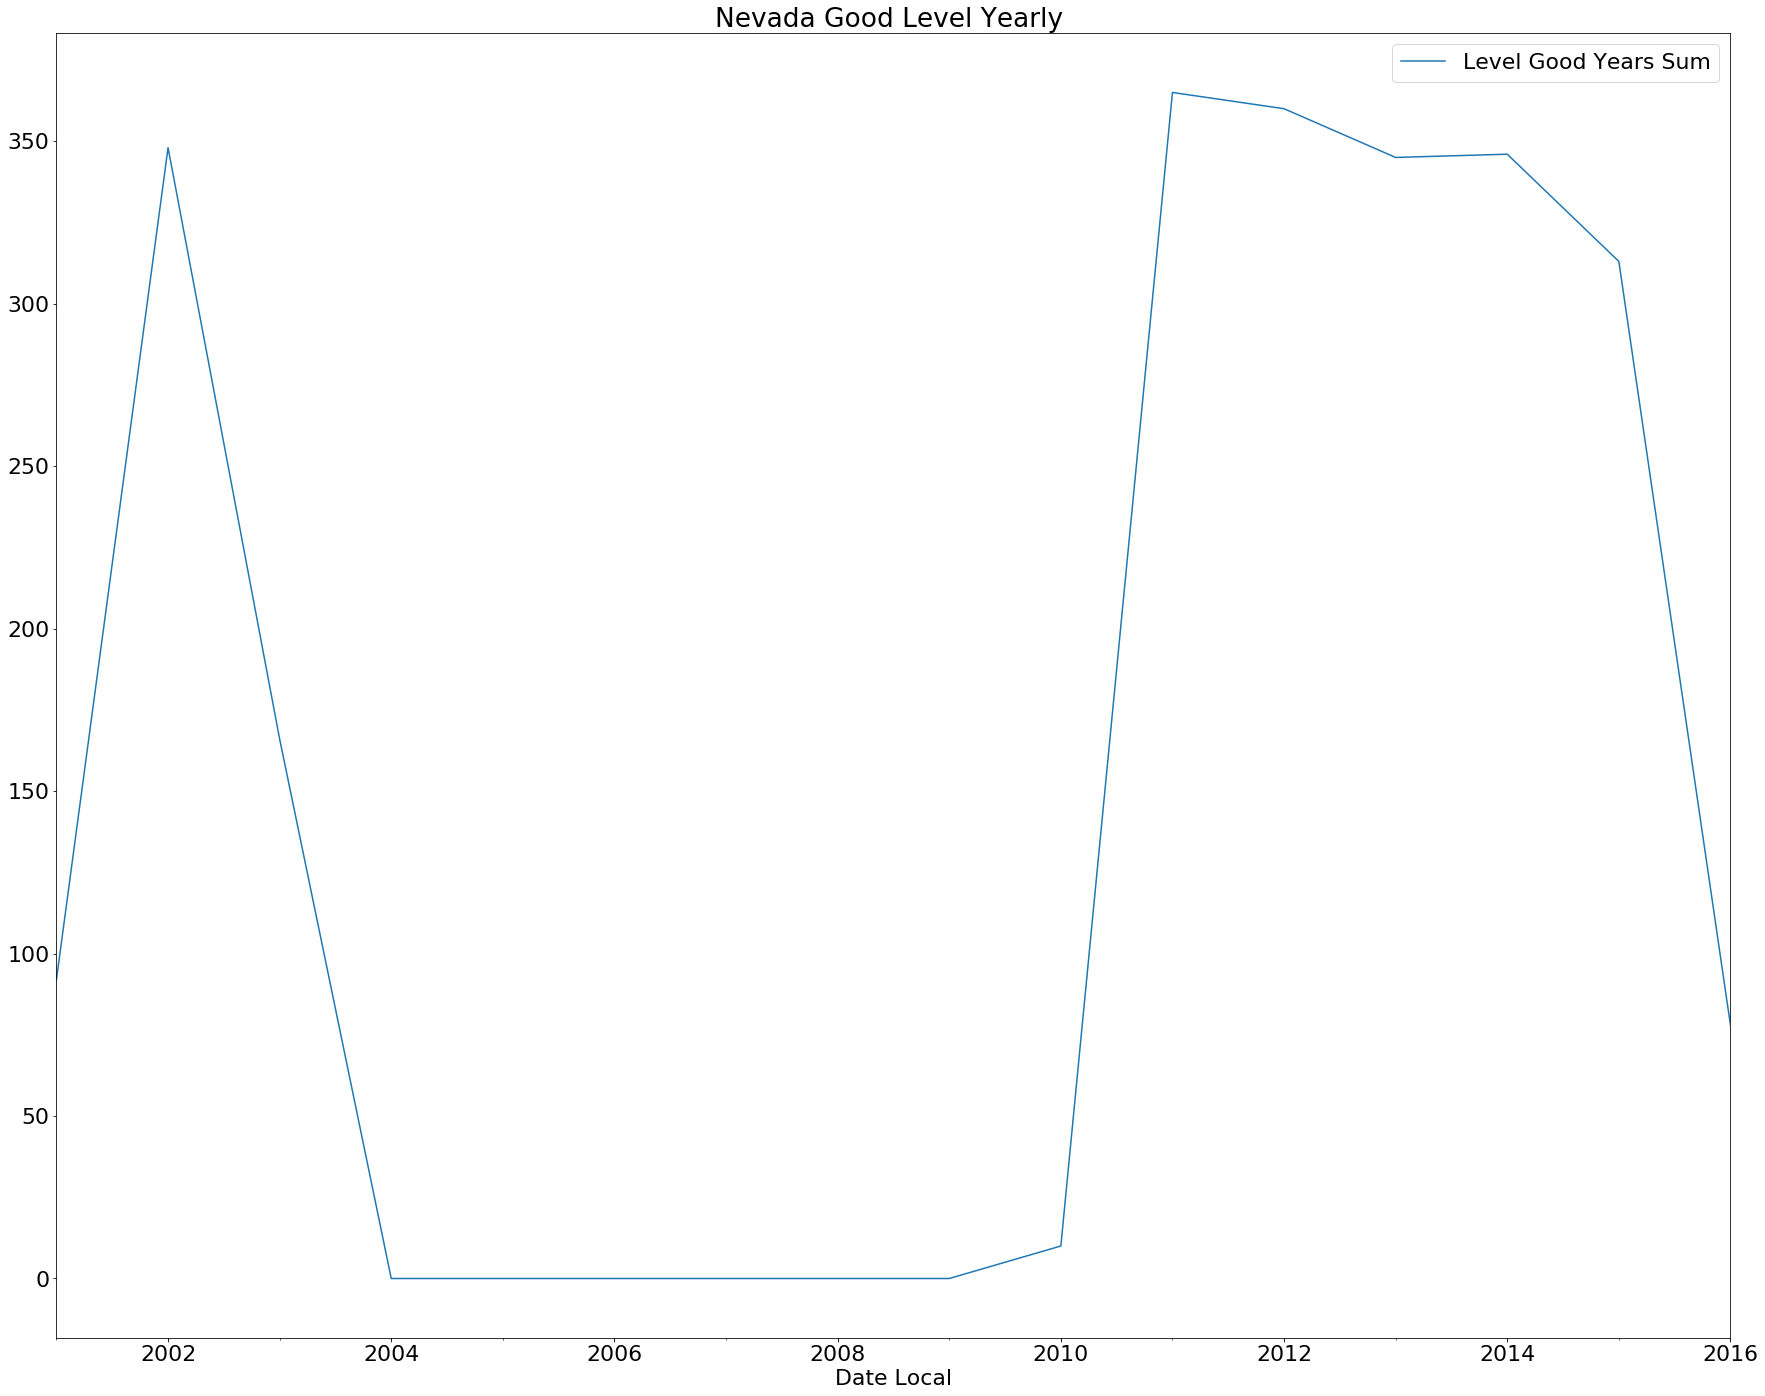

In [183]:
plt.figure(figsize=(30,24))

nevada = nevada.dropna()
nevada["AQI"] = nevada[["SO2 AQI", "O3 AQI", "NO2 AQI", "CO AQI"]].apply(lambda x: max(x), axis=1)
nevada["Level"] = nevada["AQI"].apply(AQI_level)
nevada.resample("Y", on='Date Local')["Level"].count().plot()
plt.title("Nevada Good Level Yearly ")
plt.legend(labels=["Level Good Years Sum"], loc='best')
plt.savefig("../Nevada Good day.png", bbox_inches='tight')
plt.savefig("../Nevada Good day.svg", format='svg', bbox_inches='tight')